# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [60]:
# sklearn:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [27]:
wine = load_wine(return_X_y=False)

In [31]:
X = pd.DataFrame(wine.data)
y = pd.DataFrame(wine.target)

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [55]:
km1 = KMeans(n_clusters=8, random_state=20).fit(X)
labels = km1.labels_

In [62]:
silhouette_score(X, labels, metric='euclidean')

0.5398971441034137

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [64]:
km2 = KMeans(n_clusters=5, random_state=20).fit(X)
labels = km2.labels_
silhouette_score(X, labels, metric='euclidean')

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [66]:
km3 = KMeans(n_clusters=3, random_state=20).fit(X)
labels = km3.labels_
silhouette_score(X, labels, metric='euclidean')

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [67]:
from yellowbrick.cluster import KElbowVisualizer

In [69]:
model = KMeans()

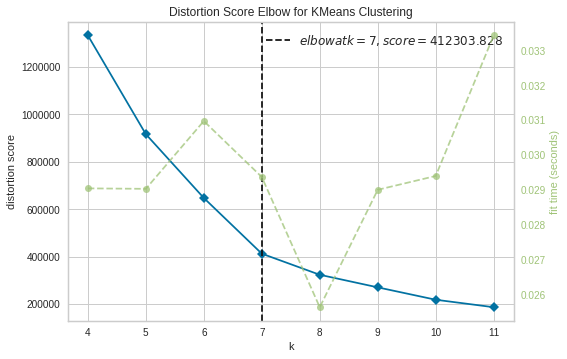

In [70]:
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

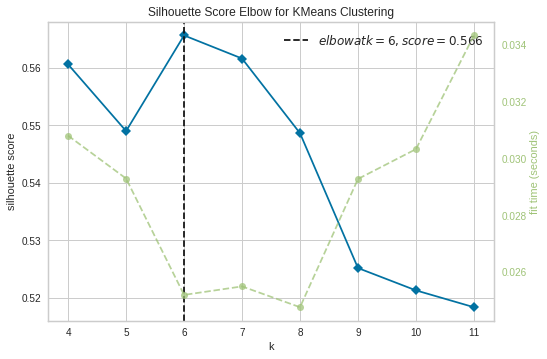

In [71]:
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.6/dist-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.6/dist-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


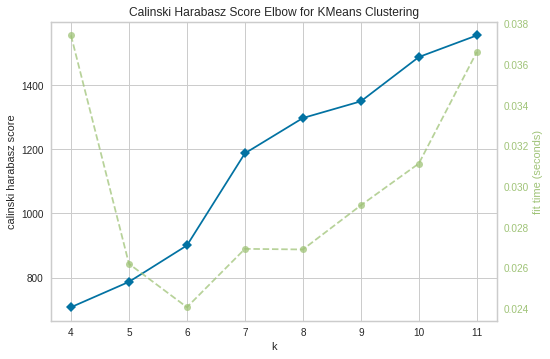

In [73]:
visualizer = KElbowVisualizer(model, k=(4,12), metric='calinski_harabasz')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [76]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
model = AgglomerativeClustering()

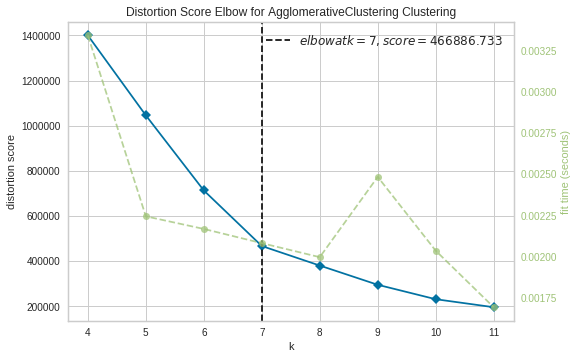

In [78]:
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

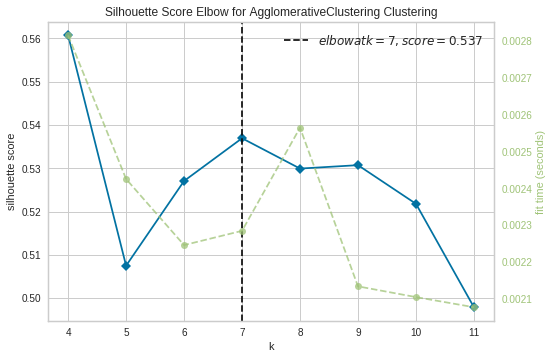

In [79]:
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

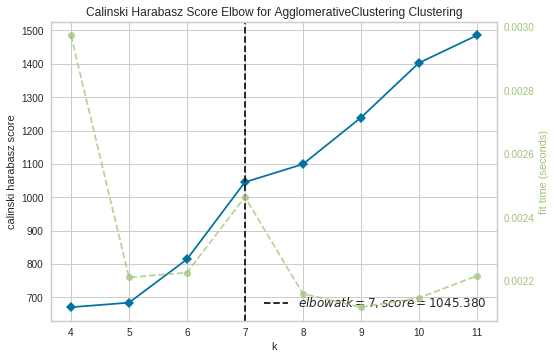

In [80]:
visualizer = KElbowVisualizer(model, k=(4,12), metric='calinski_harabasz')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The number of optimal clusters is somewhat more consistent when using Agglomerative Clustering

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [101]:
model = AgglomerativeClustering(n_clusters=7).fit_predict(X)

In [94]:
import seaborn as sns
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
X['labels'] = model.labels_

In [ ]:
# Primer bin

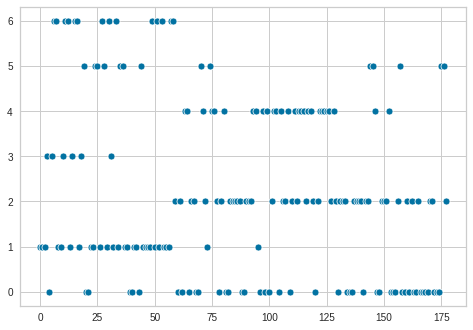

In [104]:
sns.scatterplot(data=model)

In [ ]:
#Segundo bin

In [ ]:
#Tercer bin

In [ ]:
#Cuarto bin

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [105]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents)


principalDf.head()

,0,1
0,318.561763,21.508011
1,303.096210,-5.347209
2,438.059871,-6.518564
3,733.240518,0.191505
4,-11.573394,18.513945


In [120]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.columns = ['PC1', 'PC2', 'target_label']
finalDf.head()

,PC1,PC2,target_label
0,318.561763,21.508011,0
1,303.096210,-5.347209,0
2,438.059871,-6.518564,0
3,733.240518,0.191505,0
4,-11.573394,18.513945,0


In [123]:
finalDf.target_label.unique()

array([0, 1, 2])

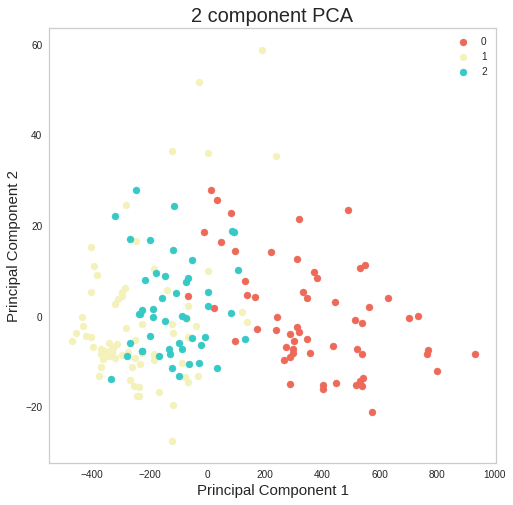

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['#ed6a5a', '#f4f1bb', '#36c9c6']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target_label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()